<a href="https://colab.research.google.com/github/IVIo3e/Fundamental-concepts-of-AI/blob/main/assignment02_habr_visual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

#Загрузка и знакомство с данными
Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle «Прогноз популярности статьи на Хабре». Скачайте данные соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [4]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/data/howpop_train.csv")

In [6]:
df.shape

(134137, 17)

In [7]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47



Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:

In [8]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [10]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/62169/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [11]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)


Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [12]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]



Создадим несколько столбцов на основе данных о времени публикации:

In [13]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

In [44]:
df.head(2)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18



#1. В каком месяце (и какого года) было больше всего публикаций?
* март 2016
* март 2015 <==
* апрель 2015
* апрель 2016

In [14]:
a = [df[(df['month'] == 3) & (df['year'] == 2016)].shape[0],
     df[(df['month'] == 3) & (df['year'] == 2015)].shape[0],
     df[(df['month'] == 4) & (df['year'] == 2015)].shape[0],
     df[(df['month'] == 4) & (df['year'] == 2016)].shape[0]]

In [15]:
a.index(max(a))+1

2

In [101]:
a2 = df[(df['year'] == 2016) | (df['year'] == 2015)] 

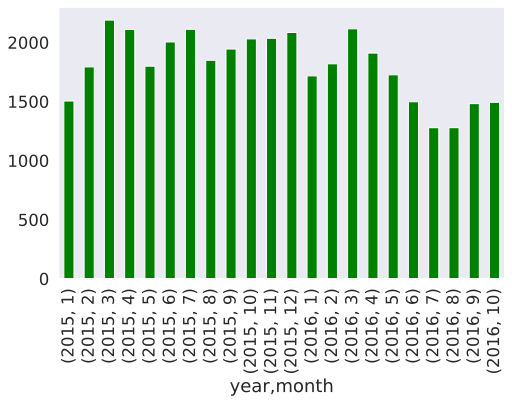

In [134]:
a2.groupby(['year', 'month'])['post_id'].count().plot(kind='bar', rot=90, color='green')

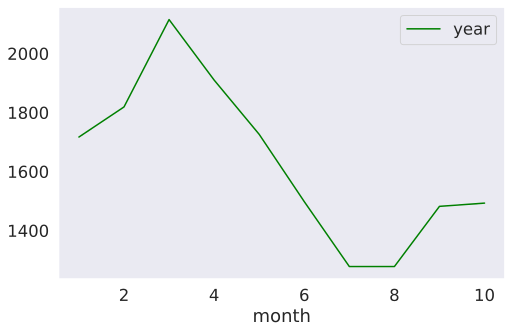

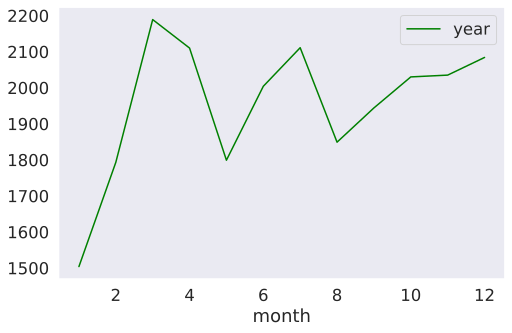

In [135]:
sales_df = df[df['year'] == 2016][[x for x in df.columns if 'year' in x] + ['month']]
sales_df.groupby(['month']).count().plot(color='green')
sales_df = df[df['year'] == 2015][[x for x in df.columns if 'year' in x] + ['month']]
sales_df.groupby(['month']).count().plot(color='green')

Ответ -> март 2015

#2. Проанализируйте публикации в месяце из предыдущего вопроса
Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре всегда больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей


Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

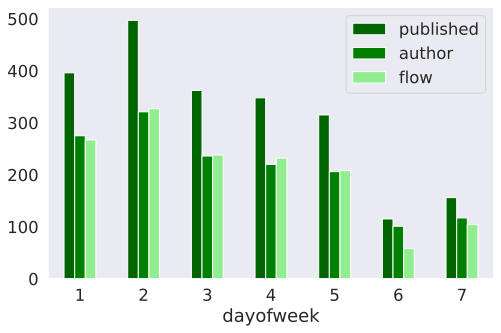

In [146]:
df[(df['year'] == 2015) & (df['month'] == 3)].groupby('dayofweek')[['published', 'author', 'flow']].count().plot(kind='bar', rot=0, color=['darkgreen', 'green', 'lightgreen'])

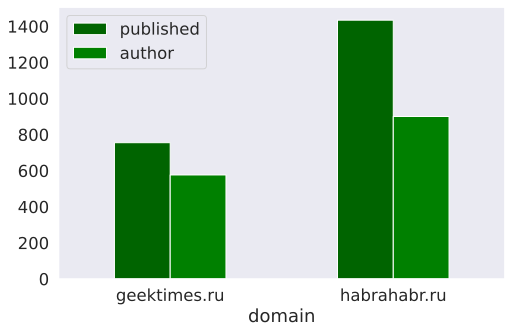

In [155]:
df[(df['year'] == 2015) & (df['month'] == 3)].groupby('domain')[['published', 'author']].count().plot(kind='bar', rot=0, color=['darkgreen', 'green'])

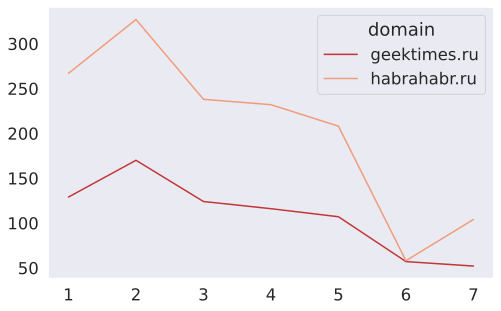

In [177]:
plt.plot(df[(df['month'] == 3) & (df['year'] == 2015) & (df['domain'] == 'geektimes.ru')].groupby(['dayofweek'])[['published']].count(), label='geektimes.ru' )
plt.plot(df[(df['month'] == 3) & (df['year'] == 2015) & (df['domain'] == 'habrahabr.ru')].groupby(['dayofweek'])[['published']].count(), label='habrahabr.ru' )
plt.legend(title='domain')

#3. Когда лучше всего публиковать статью?
* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня +
* У опубликованных в 10 утра постов больше всего комментариев -
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра -
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера -
* На хабре дневные статьи комментируют чаще, чем вечерние +

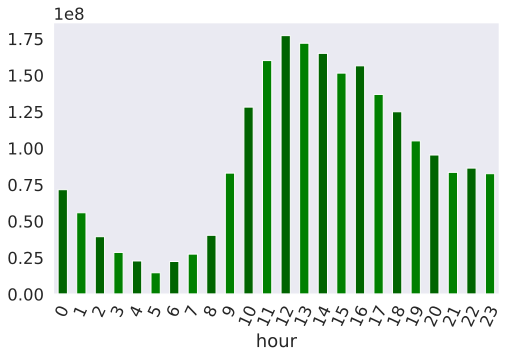

In [186]:
df.groupby('hour').sum()['views'].plot(kind='bar', rot=65, color=['darkgreen', 'green'])

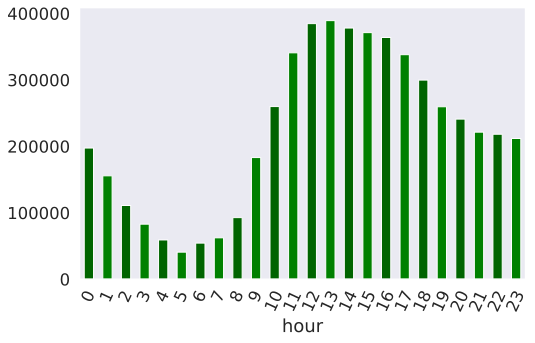

In [187]:
df.groupby('hour').sum()['comments'].plot(kind='bar', rot=65, color=['darkgreen', 'green'])

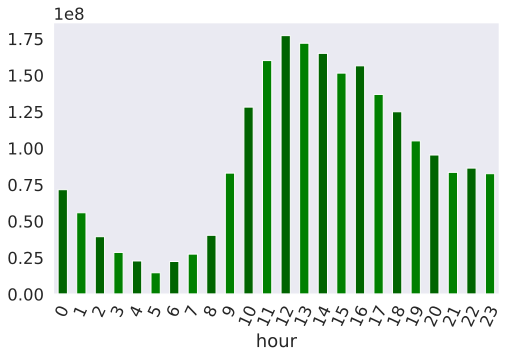

In [188]:
df.groupby('hour').sum()['views'].plot(kind='bar', rot=65, color=['darkgreen', 'green'])

In [203]:
df[(df['comments'] == max(df['comments'])) & (df['domain'] == 'geektimes.ru')]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2


In [204]:
sum(df[(df['hour'] < 6) | (df['hour'] >= 18)]['comments']) / 12

174821.08333333334

In [206]:
sum(df[(df['hour'] >= 6) & (df['hour'] < 18)]['comments']) / 12

268121.5833333333

#4. Кого из топ-20 авторов чаще всего минусуют?
* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [211]:
author = ["@Mordatyj", "@Mithgol", 
          "@alizar" ,"@ilya42"]

In [214]:
df[df["author"].isin(author)].groupby("author")['votes_minus'].mean()

author
@Mithgol     20.481081
@Mordatyj     7.471455
@alizar       7.928191
@ilya42       6.216797
Name: votes_minus, dtype: float64

In [215]:
df[df["author"].isin(author)].groupby("author")['votes_minus'].sum()

author
@Mithgol     11367.0
@Mordatyj     4057.0
@alizar      41734.0
@ilya42       3183.0
Name: votes_minus, dtype: float64

In [216]:
df[df["author"].isin(author)].groupby("author")['votes_minus'].count()

author
@Mithgol      555
@Mordatyj     543
@alizar      5264
@ilya42       512
Name: votes_minus, dtype: int64

#5. Сравните субботы и понедельники
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

#понедельник

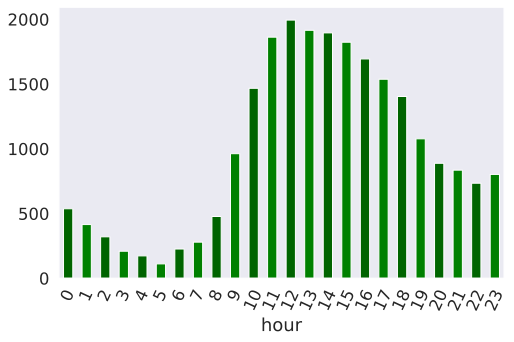

In [208]:
df[(df["dayofweek"] == 1)].groupby('hour').count()['post_id'].plot(kind='bar', rot=65, color=['darkgreen', 'green'])

In [217]:
df[(df["dayofweek"] == 1) & ((df['hour'] < 6) | (df['hour'] >= 18))].shape[0] #вечер понедельник

7505

In [218]:
df[(df["dayofweek"] == 1) & ((df['hour'] >= 6) | (df['hour'] < 18))].shape[0]

23636

#суббота

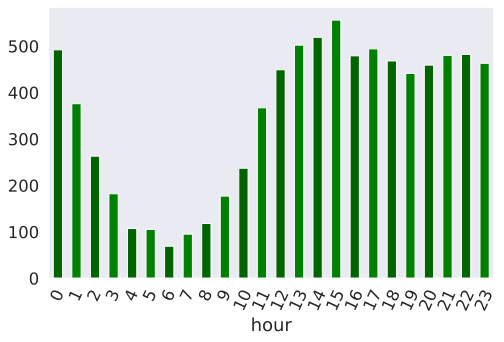

In [209]:
df[(df["dayofweek"] == 6)].groupby('hour').count()['post_id'].plot(kind='bar', rot=65, color=['darkgreen', 'green'])

In [219]:
df[(df["dayofweek"] == 6) & ((df['hour'] < 6) | (df['hour'] >= 18))].shape[0] #вечер суббота

4318

In [220]:
df[(df["dayofweek"] == 6) & ((df['hour'] >= 6) | (df['hour'] < 18))].shape[0]

8380